<a href="https://colab.research.google.com/github/dayzmerollingggg/UTDVRResearch/blob/main/Saliency_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

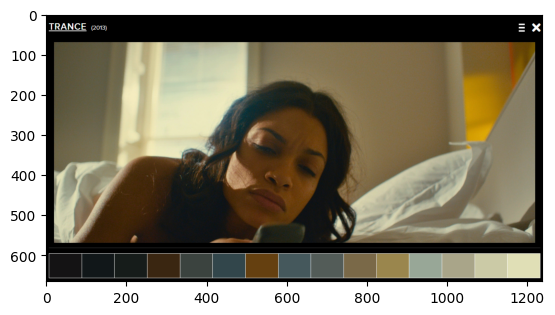

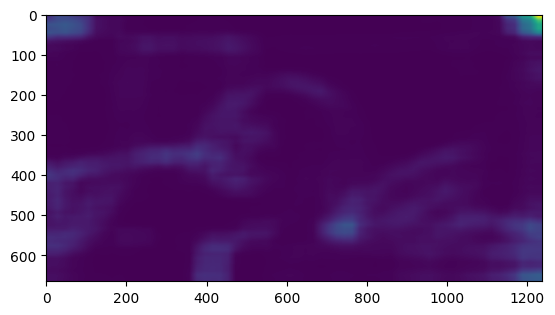

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load an image
image_path = "/content/Trance.png"  # Replace with the actual path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize the Spectral Residual Saliency Detector
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# Compute the saliency map
(success, saliencyMap) = saliency.computeSaliency(image)

# Rescale the saliency map to the range [0, 255]
saliencyMap = (saliencyMap * 255).astype("uint8")

# Display the original image and the saliency map
plt.imshow(image)
plt.show()
plt.imshow(saliencyMap)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
import cv2
import socket
import pickle

def send_saliency_map_to_unity(image_path, socket_address):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Compute the saliency map
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    (success, saliencyMap) = saliency.computeSaliency(image)

    # Encode the saliency map as an image
    encoded_saliency_map, image = cv2.imencode(".jpg", saliencyMap)

    # Create a socket and connect to Unity
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.connect(socket_address)

    # Send the encoded saliency map to Unity
    data = pickle.dumps(encoded_saliency_map.tobytes())
    sock.sendall(data)

    # Close the socket
    sock.close()

# Specify the image path and socket address
image_path = "/content/Trance.png"
socket_address = ("localhost", 8080)

# Send the saliency map to Unity
send_saliency_map_to_unity(image_path, socket_address)


AttributeError: ignored